In [ ]:
from storypy.preprocess import ESMValProcessor, ModelDataPreprocessor, parse_config

In [ ]:
"""
The config dictionary below contains user-defined settings for the analysis using ESMValTool.
"""
user_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/work',
        plot_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/plots',
        var_name=['pr'],
        exp_name='ssp585',
        freq='mon',
        grid='g025',
        region_method='box',
        period1 = ['1960', '1990'],
        period2 = ['2070', '2100'],
        region_id=18,
        season=(11, 12, 1, 2, 3),  # Now provided as a tuple of months
        region_extents=[(25, 90, -180, 180)],
        box=(-13.75, 43.75, 26.25, 58.75),
        titles=["Region A", "Region B"]
    )
"""
driver_config = dict(
        var_name=['psl'],            # <- actual variable names in NetCDF
        short_name=['test_ubi'],           # <- names for regression/CSV outputs
        period1=['1960', '1979'],
        period2=['2070', '2099'],
        season=[12,1,2],
        box={'lat_min': 50, 'lat_max': 70, 'lon_min': 40, 'lon_max': 70},
        work_dir='/climca/people/storylinetool/test_user/driver_test_outputs'
    )
"""
# Load the configuration file
config= parse_config('/climca/people/ralawode/esmvaltool_output/test_recipe_20251014_135020/run/storyline_analysis/multiple_regresion/settings.yml')

In [ ]:
processor_target = ESMValProcessor(config, user_config)

## Logic 2

In [ ]:
"""
The config dictionary below contains user-defined settings for the analysis using Logic2 [Model Data].
"""
user_config = dict(
        data_dir='/climca/data/cmip6-ng',
        work_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/work',
        plot_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/plots',
        var_name=['pr'],
        exp_name='ssp585',
        freq='mon',
        grid='g025',
        region_method='box',
        period1 = ['1960', '1990'],
        period2 = ['2070', '2100'],
        region_id=18,
        season=(11, 12, 1, 2, 3),  # Now provided as a tuple of months
        region_extents=[(25, 90, -180, 180)],
        box=(-13.75, 43.75, 26.25, 58.75),
        titles=["Region A", "Region B"]
    )
"""
driver_config = dict(
        var_name=['psl'],            # <- actual variable names in NetCDF
        short_name=['test_ubi'],           # <- names for regression/CSV outputs
        period1=['1960', '1979'],
        period2=['2070', '2099'],
        season=[12,1,2],
        box={'lat_min': 50, 'lat_max': 70, 'lon_min': 40, 'lon_max': 70},
        work_dir='/climca/people/storylinetool/test_user/driver_test_outputs'
    )
"""

In [ ]:
processor_target = ModelDataPreprocessor(config, user_config)

/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_coord = xr.cftime_range(start=data.indexes['time'].to_datetimeindex()[0], periods=data['time'].size, freq='ME')
/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_coord = xr.cftime_range(start=data.indexes['time'].to_datetimeindex()[0], periods=data['time'].size, freq='ME')
/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CF

Saved ensemble mean data to /climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/work/target_pr.nc
Target Change Extent:
Longitude: -178.75 to 178.75
Latitude: 21.25 to 88.75
Aligning p_values...
P-Values Extent:
Longitude: -178.75 to 178.75
Latitude: 21.25 to 88.75
Aligning positives_model and negatives_model...
Positives Model Extent:
Longitude: 1.25 to 178.75
Latitude: 21.25 to 88.75
Negatives Model Extent:
Longitude: 1.25 to 178.75
Latitude: 21.25 to 88.75
Adding p_values stippling...
Adding positives/negatives stippling...


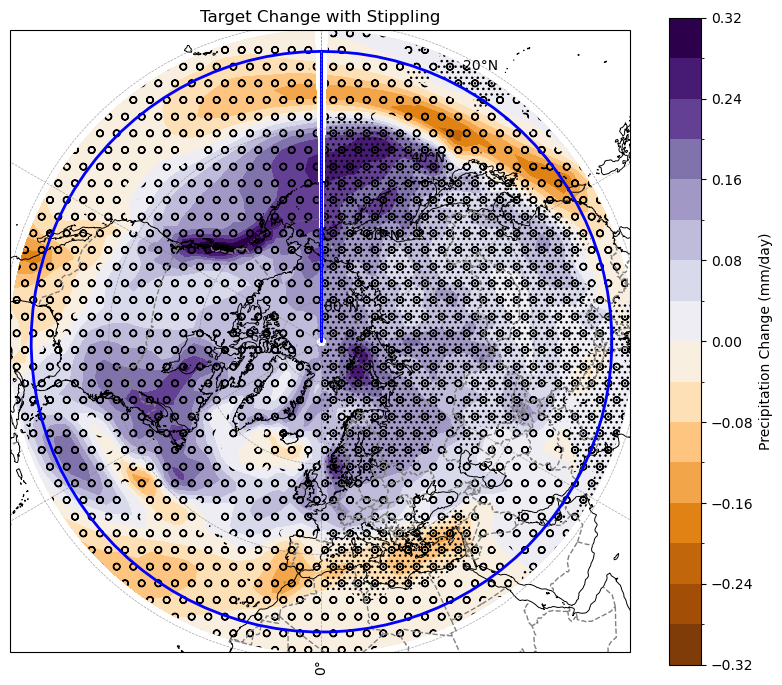

In [4]:
processor_target.process_var()

In [ ]:
from storypy.compute import run_regression

main_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/work',
        target_variable=['pr']
    )

outputs = run_regression(main_config)

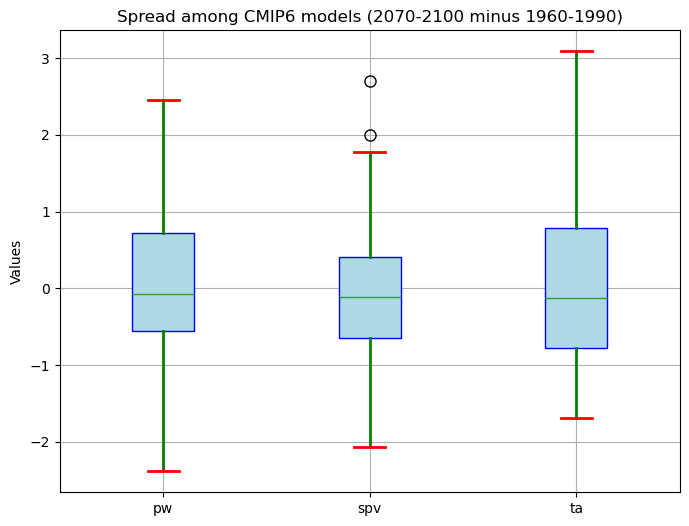

In [1]:
# Make a boxplot.
from storypy.data import read_drivers
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
# Plot boxplot of Tropical Warming, Polar Warming and Stratospheric Polar Vortex

user_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/work',
        plot_dir='/climca/people/storylinetool/esmvaltool_output/zappa_shepherd_CMIP6_20250725_181934/plots'
    )

# Directly read the drivers from the output file in the work_dir.
driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0)

models = rds.index.tolist()
# Boxplot with customizations
plt.figure(figsize=(8, 6))
rds.boxplot(patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='green', linewidth=2),
           capprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', color='black', markersize=8))

plt.title('Spread among CMIP6 models (2070-2100 minus 1960-1990)')
plt.ylabel('Values')
plt.show()

## STORLINE ANALYSIS WITH PLOTS

In [ ]:
from storypy.evaluate.plot import hemispheric_plot
import os
import xarray as xr
import numpy as np

# Or directly read the data from the output file in the work_dir.
data_path = os.path.join(user_config['work_dir'], "regression_output/u850/R2.nc")
data = xr.open_dataset(data_path).u850 * 200

levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
hemispheric_plot(data, levels, extent, cmap="OrRd", title="Variance (R2) in CMIP6 for Cold Season Precipitation", colorbar_label="R2 coefficient")

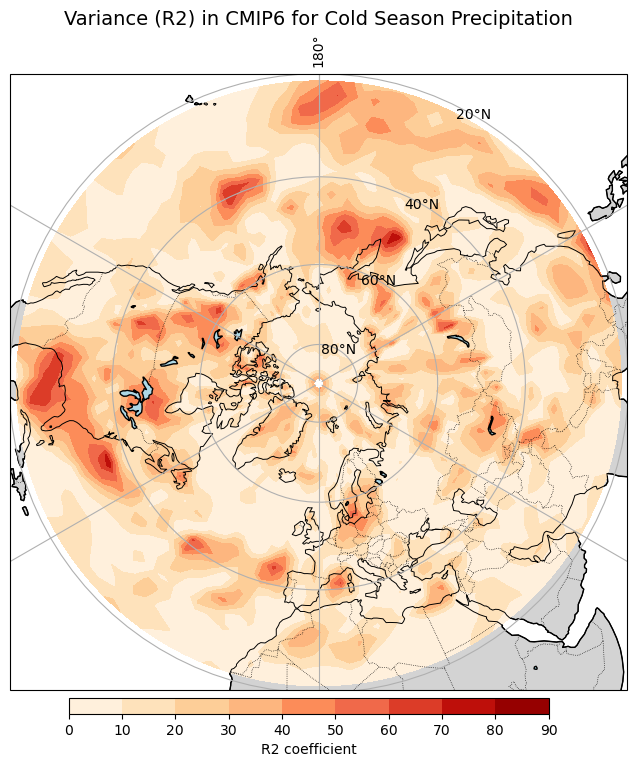

In [ ]:
from storypy.evaluate.plot import hemispheric_plot
import os
import xarray as xr
import numpy as np

# Or directly read the data from the output file in the work_dir.
data_path = os.path.join(user_config['work_dir'], "regression_output/pr/R2.nc")
data = xr.open_dataset(data_path).pr * 200

levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
hemispheric_plot(data, levels, extent, cmap="OrRd", title="Variance (R2) in CMIP6 for Cold Season Precipitation", colorbar_label="R2 coefficient")

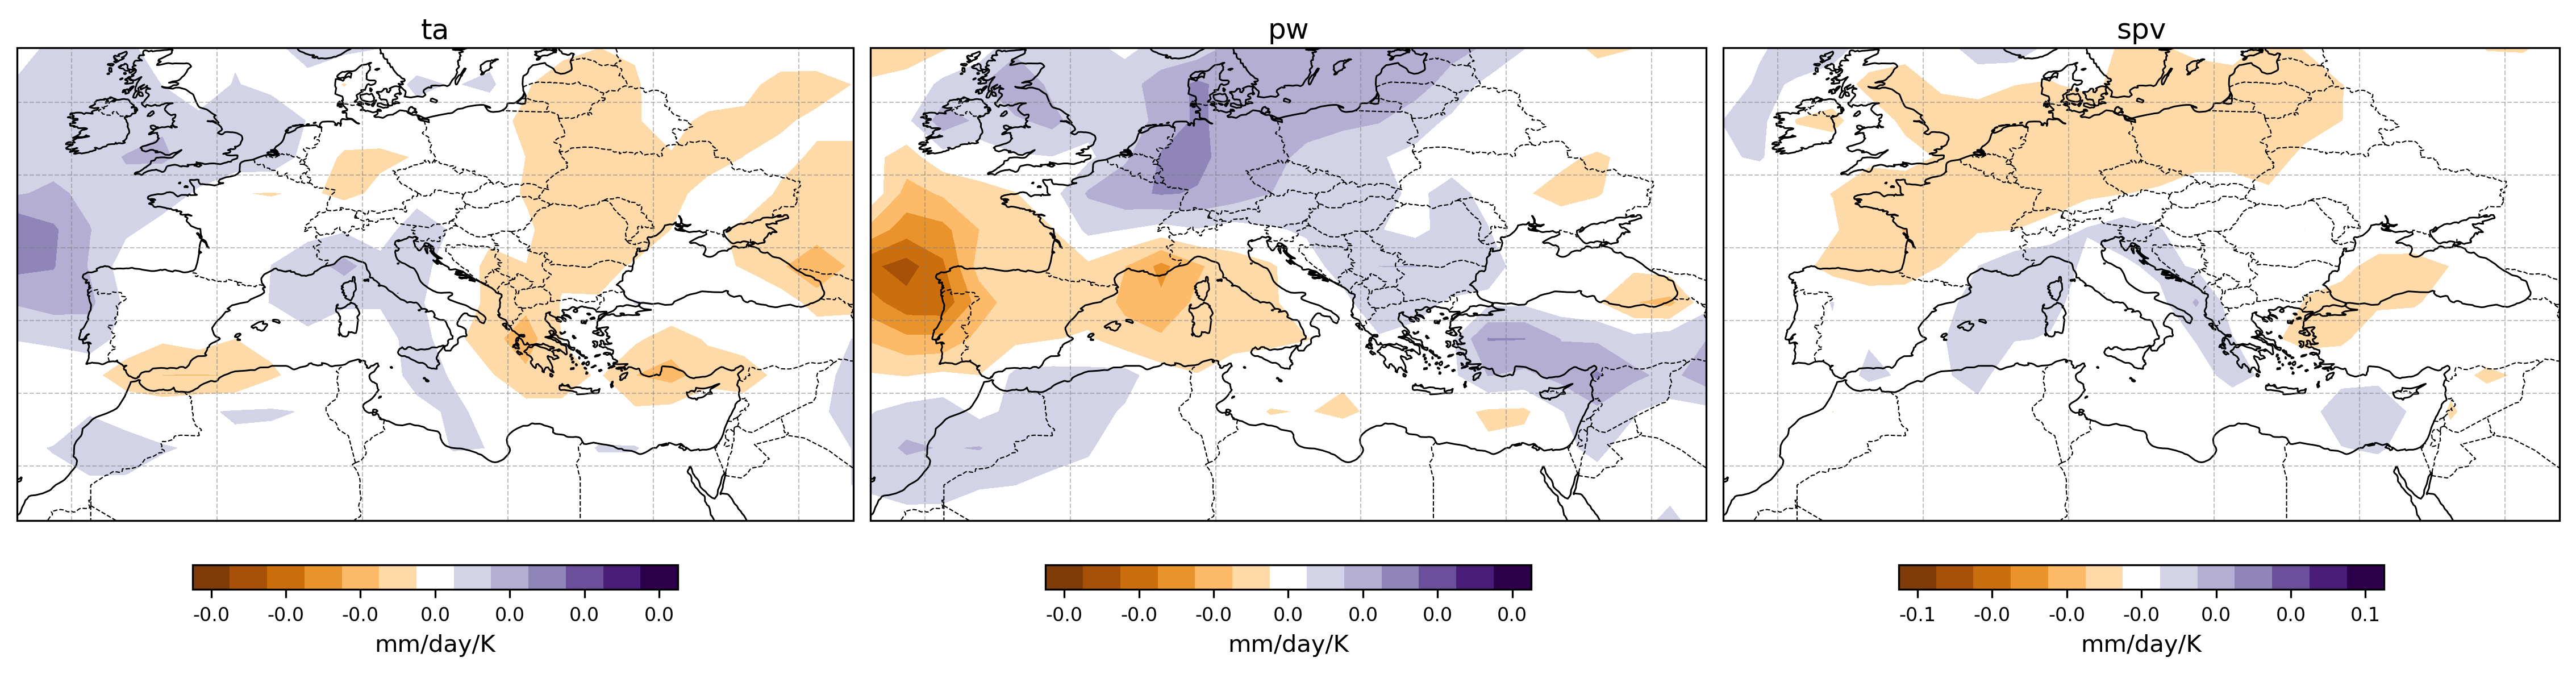

In [3]:
# from storypy.data import read_pr_regression_coefficients
from storypy.evaluate.plot import create_three_panel_figure, regression_coefficient, create_multi_panel_figure
import numpy as np

target = 'pr'
drivers = ['ta', 'pw', 'spv']
storyline_coefficient = 1.26

coefficients, titles = regression_coefficient(user_config, target, drivers, storyline_coefficient)

levels = [np.arange(-.08, .09, .01)] * 3
extent = [user_config["box"]] * 3
cmaps = ['PuOr'] * 3

# titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_multi_panel_figure(coefficients, extent, cmaps, titles, colorbar_label="mm/day/K")

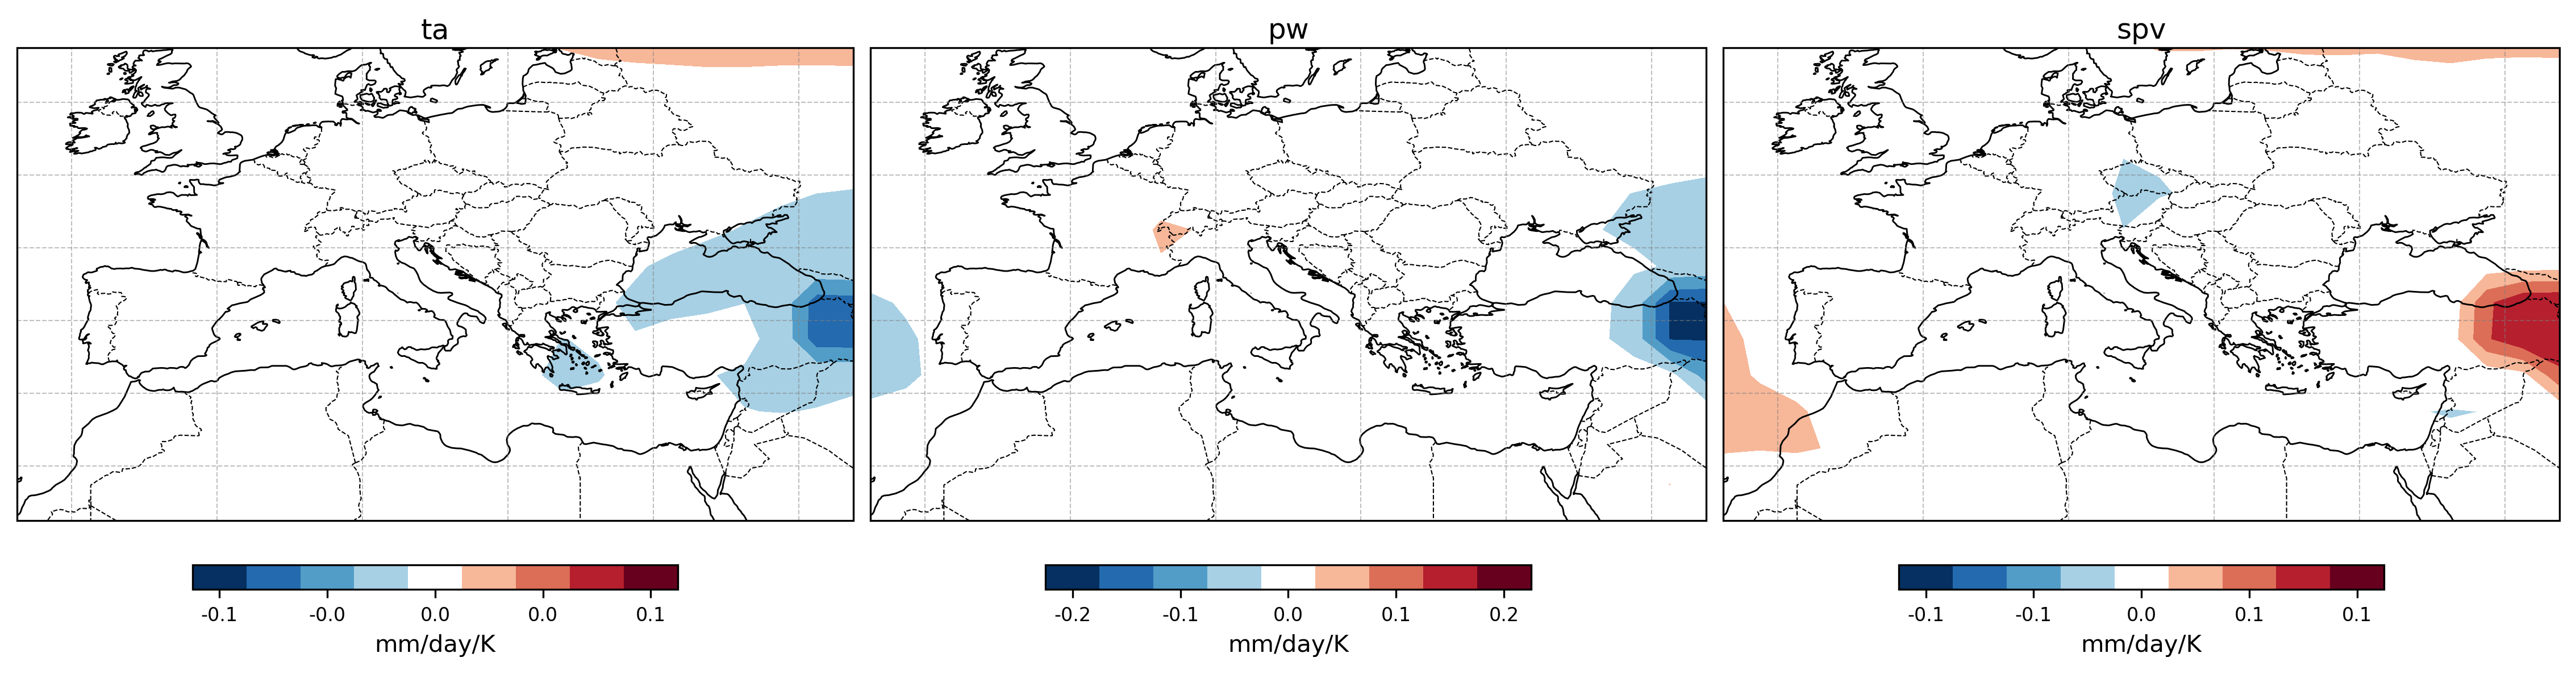

In [5]:
# from storypy.data import read_pr_regression_coefficients
from storypy.evaluate.plot import create_three_panel_figure, regression_coefficient, create_multi_panel_figure
import numpy as np

target = 'u850'
drivers = ['ta', 'pw', 'spv']
storyline_coefficient = 1.26

coefficients, titles = regression_coefficient(user_config, target, drivers, storyline_coefficient)

levels = [np.arange(-.08, .09, .01)] * 3
extent = [user_config["box"]] * 3
cmaps = ['RdBu_r'] * 3

# titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_multi_panel_figure(coefficients, extent, cmaps, titles, colorbar_label="mm/day/K")

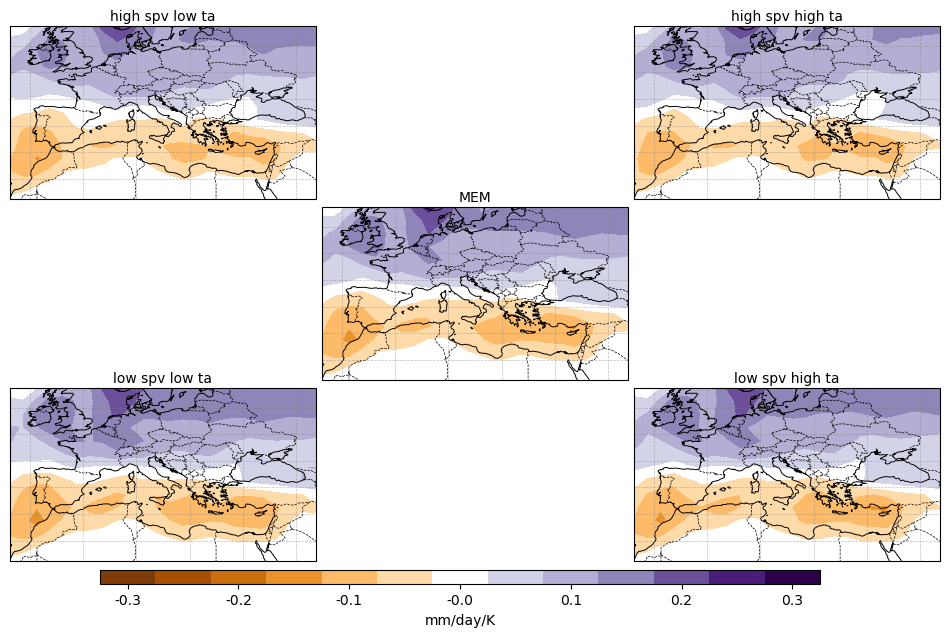

In [ ]:
from storypy.evaluate.plot import create_five_panel_figure, storyline_evaluation

target = 'pr'
drivers = ['ta', 'spv']

# --- Call the function ---
storyline_coefficient = 1.26
storylines, titles = storyline_evaluation(user_config, target, drivers, storyline_coefficient)

# --- Plotting setup ---
cmaps = ['PuOr'] * 5
levels = [np.arange(-.3, .35, .05)] * 5
extent = [user_config["box"]] * 5

fig = create_five_panel_figure(
    storylines, extent, levels, cmaps, titles,
    colorbar_label="mm/day/K"
)

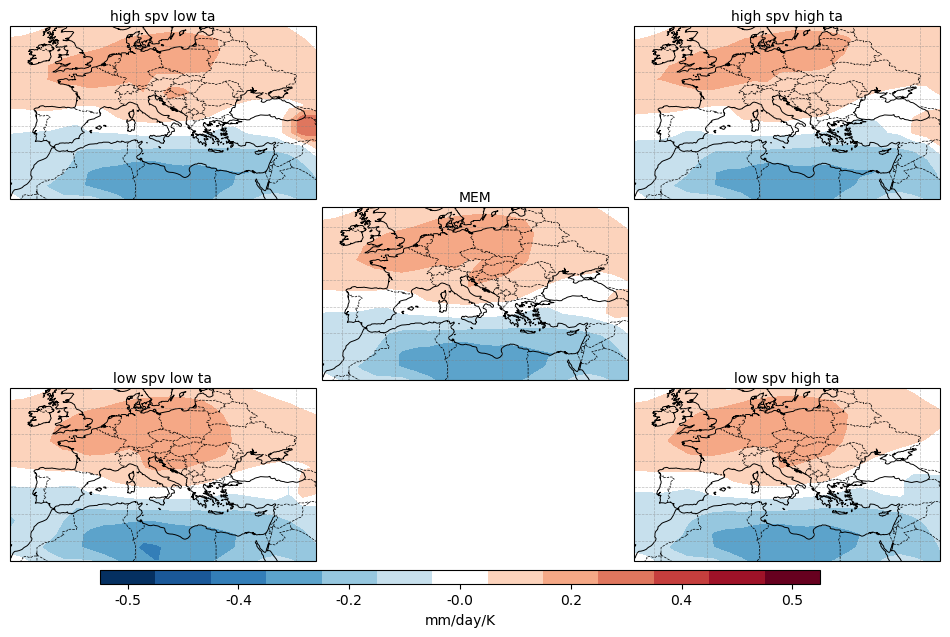

In [ ]:
from storypy.evaluate.plot import create_five_panel_figure, storyline_evaluation

target = 'u850'
drivers = ['ta', 'spv']

# --- Call the function ---
storyline_coefficient = 1.26
storylines, titles = storyline_evaluation(user_config, target, drivers, storyline_coefficient)

# --- Plotting setup ---
cmaps = ['RdBu_r'] * 5
levels = [np.arange(-.3, .35, .05)] * 5
extent = [user_config["box"]] * 5

fig = create_five_panel_figure(
    storylines, extent, levels, cmaps, titles,
    colorbar_label="mm/day/K"
)

['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CESM2', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5-1', 'CanESM5-CanOE', 'CanESM5', 'E3SM-1-0', 'EC-Earth3', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-2-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM', 'MCM-UA-1-0', 'MIROC-ES2H', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
90.0
90.0
90.0


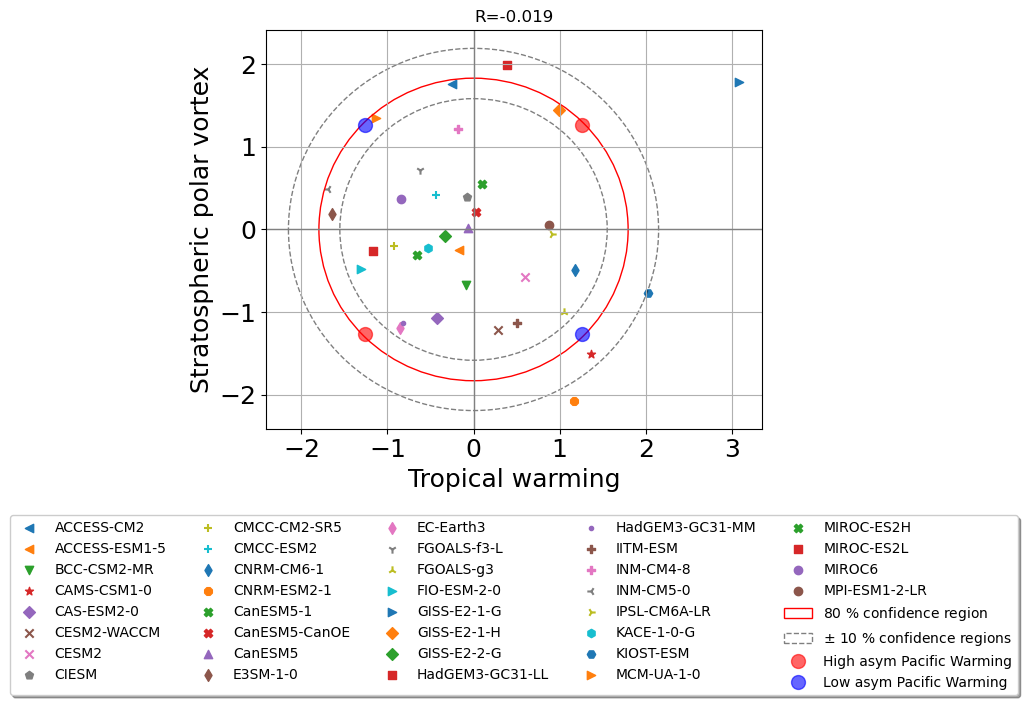

In [ ]:
from storypy.evaluate.plot import plot_ellipse
import pandas as pd

driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0).dropna()

models = rds.index.tolist()
fig = plot_ellipse(models,rds["ta"].values,rds["spv"].values,corr="no",x_label="Tropical warming",y_label="Stratospheric polar vortex",)

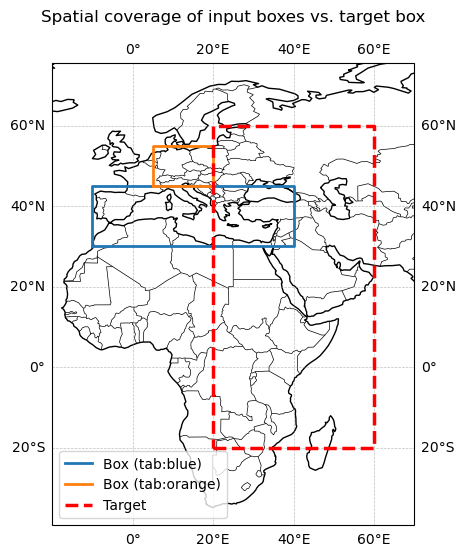

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define boxes: (lat_min, lat_max, lon_min, lon_max)
boxes = [
    (30, 45, -10, 40),   # Box 1
    (45, 55, 5, 20),     # Box 2
]
target = (-20, 60, 20, 60)  # Target region

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-20, 70, -30, 70])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")

# Plot the original boxes
colors = ["tab:blue", "tab:orange"]
for (lat_min, lat_max, lon_min, lon_max), col in zip(boxes, colors):
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
            [lat_min, lat_min, lat_max, lat_max, lat_min],
            color=col, linewidth=2, transform=ccrs.PlateCarree(), label=f"Box ({col})")

# Plot target box
lat_min, lat_max, lon_min, lon_max = target
ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
        [lat_min, lat_min, lat_max, lat_max, lat_min],
        color="red", linewidth=2.5, linestyle="--", transform=ccrs.PlateCarree(), label="Target")

ax.legend(loc="lower left")
plt.title("Spatial coverage of input boxes vs. target box", pad=15)
plt.show()


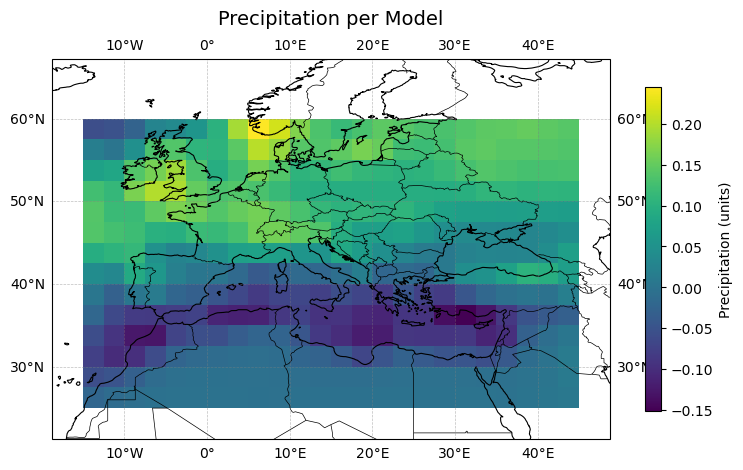

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# --- open your dataset (if not already in memory)
logic1 = '/climca/people/ralawode/esmvaltool_output/test_recipe_20251014_135020/work/target.nc'
ds = xr.open_dataset(logic1)

# Select one model
da = ds['pr'].sel(model='ACCESS-CM2')

# Make a map
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([da.lon.min() - 5, da.lon.max() + 5,
               da.lat.min() - 5, da.lat.max() + 5])

ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

im = ax.pcolormesh(da.lon, da.lat, da, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Precipitation (units)')

plt.title('Precipitation per Model', fontsize=14, pad=10)
plt.show()



In [ ]:

def create_multi_panel_figure(
    data_list,            # list of xarray.DataArray (each with .lat, .lon)
    extent_list,          # list of [lon_min, lon_max, lat_min, lat_max]
    colormaps,            # list of colormap names (same length as data_list)
    titles,               # list of subplot titles
    colorbar_label='Colorbar Label',
    mask_range=None,      # e.g., (-0.02, 0.02) to mask near-zero, or None
    num_steps=12,         # color level resolution
    ncols=3,              # number of columns in the figure
    figsize_per_plot=(5, 4)  # approximate size per subplot
):
    """
    Flexible multi-panel map plotting function with individual colorbars.

    Each subplot has:
      - its own colorbar
      - symmetric color levels centered at 0 (with white band)
      - consistent coastlines and gridlines
    """

    nplots = len(data_list)
    nrows = math.ceil(nplots / ncols)
    figsize = (figsize_per_plot[0] * ncols, figsize_per_plot[1] * nrows)

    fig, axs = plt.subplots(
        nrows, ncols,
        figsize=figsize, dpi=300, constrained_layout=True,
        subplot_kw={'projection': ccrs.PlateCarree()}
    )

    # Flatten axes for easy iteration
    axs = np.array(axs).flatten()

    for i, ax in enumerate(axs[:nplots]):
        data = data_list[i]

        # --- Setup map ---
        ax.set_extent(extent_list[i], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
        ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)
        ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

        # --- Symmetric color range ---
        plot_range = max(abs(data.min()), abs(data.max()))
        color_levels, tick_levels = make_symmetric_colorbar(plot_range, num_steps=12)

        # --- Centered white colormap ---
        original_cmap = plt.get_cmap(colormaps[i])
        shifted_cmap = original_cmap(np.linspace(0, 1, len(color_levels)))
        mid_index = len(color_levels) // 2
        shifted_cmap[mid_index - 1:mid_index + 1] = [1, 1, 1, 1]
        new_cmap = mcolors.ListedColormap(shifted_cmap)

        # --- Mask near zero ---
        data_cyclic, lon_cyclic = add_cyclic_point(data.values, coord=data.lon)
        # if mask_range is not None:
        #     masked = np.ma.masked_inside(data_cyclic, mask_range[0], mask_range[1])
        # else:
        #     masked = data_cyclic

        norm = mcolors.TwoSlopeNorm(vmin=-plot_range, vcenter=0, vmax=plot_range)

        # --- Plot ---
        im = ax.contourf(
            lon_cyclic, data.lat, data_cyclic,
            levels=color_levels, cmap=new_cmap, norm=norm,
            transform=ccrs.PlateCarree()
        )

        ax.set_title(titles[i], fontsize=12, pad=4)

        # --- Individual colorbar ---
        cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
        cbar.set_label(colorbar_label, fontsize=10)
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))
        cbar.ax.tick_params(labelsize=8)

    # Hide unused axes if nplots < nrows * ncols
    for ax in axs[nplots:]:
        ax.set_visible(False)

    plt.show()
